#### Unsupervised Clustering. Gaussian Mixture Model (GMM).

#### Gaussian Mixture (2D example)

<div>
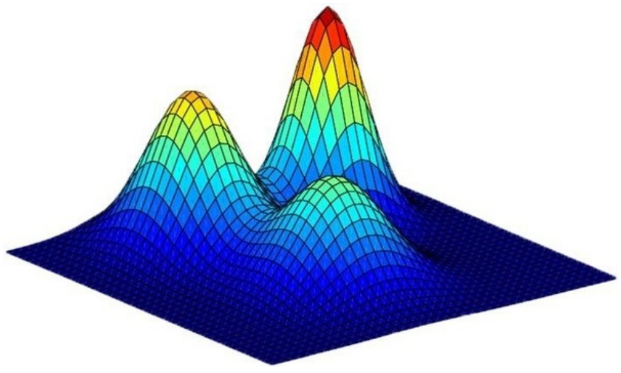
</div>


- A **Gaussian mixture model** is a probabilistic model that assumes all the data points are generated from a mixture of a finite number (k) of Gaussian distributions.

#### GMM Clustering

- unsupervised clustering algorithm (= k_means)
- grups objects into k clusters, where k is unknown (= k_means)
- assumes each cluster follows a Gaussian distribution (!= k_means, assume spherical clusters)
- parametric model (!= k-means, non-parametric)
- soft-assignment of objects to clusters (!= k-means, hard-assignment of objects to clusters)
    - hard_assignment: each object is asigned to a unique cluster
    - soft-assignment: objects have a not-null probability of belonging to each cluster

<div>
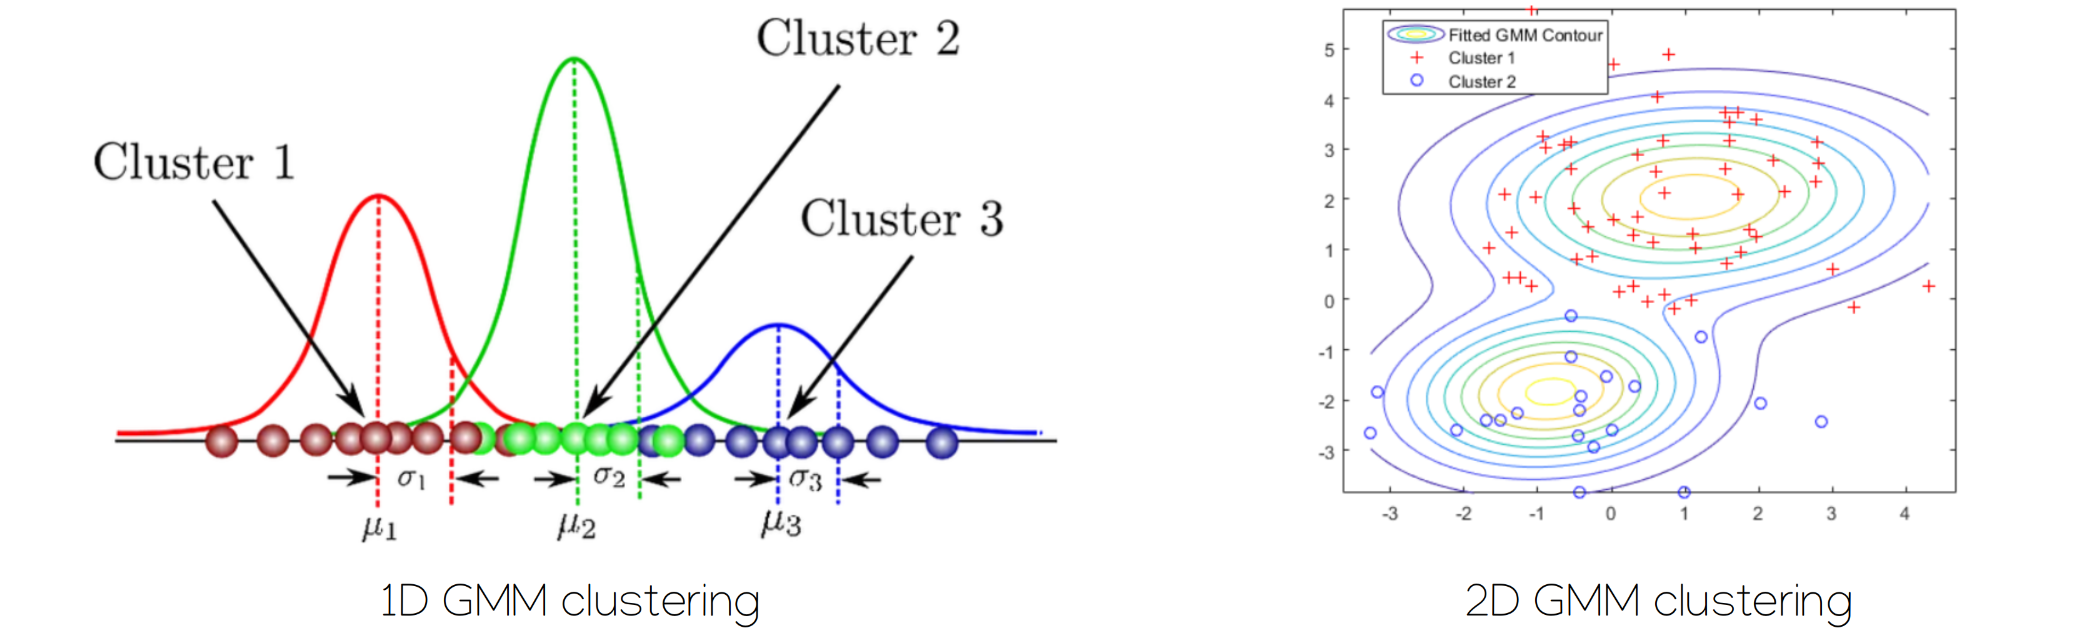
</div>

#### heuristic

- maximize the log-likelihood of the model $\mathcal{L}\left(\theta, X\right)$
- use the Expectation-Maximization (EM) algorithm (Dempster et al., 1977)
    - iterative algorithm to find maximum-likelihood estimates for model parameters, where the model depends on unobserved latent variables (e.g. class)
    - does not promise to reach a global maximum of the likelihood function
    - it is guaranteed to converge to a local maximum

In [ ]:
# GMM-clustering GIF
url = "https://en.wikipedia.org/wiki/Expectation%E2%80%93maximization_algorithm#/media/File:EM_Clustering_of_Old_Faithful_data.gif"
print(url)

#### Example

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#### generate synthetic dataset

In [ ]:
from sklearn.datasets import make_classification, make_regression

In [ ]:
X, y = make_classification(n_samples=1000, n_features=5, n_informative = 3, n_classes = 3, n_clusters_per_class = 1, class_sep = 2.0, n_redundant = 0, random_state = 2783)
print(X.shape, y.shape)

#### train/test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, y, test_size = 0.2)

#### instantiate Gaussian-mixture model (GMM)

In [ ]:
from sklearn.mixture import GaussianMixture

In [ ]:
gm = GaussianMixture(n_components = 3, random_state = 0).fit(Xtrain)

In [ ]:
gm.means_

In [ ]:
Ypred = gm.predict(Xtest)

#### evaluate GMM

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [ ]:
cm = confusion_matrix(Ytest, Ypred)
ConfusionMatrixDisplay(cm).plot();

#### sample data from the GMM

In [ ]:
gmX = gm.sample(1000)
type(gmX), len(gmX)

In [ ]:
gmX[0].shape, gmX[1].shape

#### GMM data exploration. Q-Q plot

In [ ]:
import statsmodels.api as sm

#### standard qq-plot (orginal data vs. normal data)

- red line shows normal quantiles

In [ ]:
fig, axs = plt.subplots(1, X.shape[1], figsize = (25, 25 //X.shape[1]))
for i, axi in enumerate(axs.flatten()): 
    sm.qqplot(X[:, i], line = '45', ax = axi);

#### qq-plot: original data vs. generated data

- red line shows equality of quantiles

In [ ]:
fig, axs = plt.subplots(1, gmX[0].shape[1], figsize = (25, 5))
for i, axi in enumerate(axs.flatten()):
    qX = np.quantile(X[:, i], np.linspace(0, 1, 100))
    qY = np.quantile(gmX[0][:, i], np.linspace(0, 1, 100))
    axi.scatter(qX, qY, c = 'b', s = 3)
    # plot 45º line
    xtcks = axi.get_xticks()
    axi.plot(xtcks, xtcks, '-r', linewidth = 0.8)